# Exercícios Pandas e Plot

As questões a seguir utilizam como base o dataset de venda de jogos eletrônicos disponível no seguinte [link.](https://www.kaggle.com/code/rafa84miranda/vendas-de-jogos-de-videogames/data?select=vgsales.csv)

Os campos são:
- Rank: posição no ranking de vendas
- Name: nome do jogo
- Platform: plataforma/console
- Year: ano de lançamento
- Genre: gênero
- Publisher: empresa que publicou o jogo
- NA_Sales: vendas na américa do norte (em milhões de dólares)
- EU_Sales: vendas na europa (em milhões de dólares)
- JP_Sales: vendas no japão (em milhões de dólares)
- Other_Sales: outras vendas (em milhões de dólares)
- Global_Sales: vendas globais (em milhões de dólares)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_vgsales = pd.read_csv('../../dados_exercicios/vgsales.csv')

df_vgsales.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [3]:
df_vgsales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16324 entries, 0 to 16323
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16324 non-null  int64  
 1   Name          16324 non-null  object 
 2   Platform      16324 non-null  object 
 3   Year          16324 non-null  int64  
 4   Genre         16324 non-null  object 
 5   Publisher     16288 non-null  object 
 6   NA_Sales      16324 non-null  float64
 7   EU_Sales      16324 non-null  float64
 8   JP_Sales      16324 non-null  float64
 9   Other_Sales   16324 non-null  float64
 10  Global_Sales  16324 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [4]:
df_vgsales = df_vgsales.fillna({'Publisher': 'Unknown'})

df_vgsales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16324 entries, 0 to 16323
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16324 non-null  int64  
 1   Name          16324 non-null  object 
 2   Platform      16324 non-null  object 
 3   Year          16324 non-null  int64  
 4   Genre         16324 non-null  object 
 5   Publisher     16324 non-null  object 
 6   NA_Sales      16324 non-null  float64
 7   EU_Sales      16324 non-null  float64
 8   JP_Sales      16324 non-null  float64
 9   Other_Sales   16324 non-null  float64
 10  Global_Sales  16324 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [5]:
df_vgsales.duplicated(["Rank","Name"]).sum()


0

1) Qual foi o jogo mais vendido no mundo em 2010?

In [6]:
df_vgsales['Year'].unique()


array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016], dtype=int64)

In [7]:
df_2010 = df_vgsales[df_vgsales['Year'] == 2010]

df_mais_vendido_2010 = df_2010.loc[[df_2010['Global_Sales'].idxmax()]]

df_mais_vendido_2010


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11183,16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82


2) Qual foi a empresa que mais vendeu de 2005 até 2016? Construa um gráfico de barras para apresentar.

In [8]:
df_empresas_entre_2005_e_2016 = df_vgsales[
    (df_vgsales['Year'] >= 2005) &
    (df_vgsales['Year'] <= 2016)
]

df_empresas_entre_2005_e_2016 = df_empresas_entre_2005_e_2016.groupby(['Publisher'])[[
    'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'
]].sum().reset_index()

df_empresas_entre_2005_e_2016 = df_empresas_entre_2005_e_2016.sort_values(by='Global_Sales', ascending=False)

df_empresas_entre_2005_e_2016.head()


,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
246,Nintendo,382.83,278.03,224.54,72.82,958.43
94,Electronic Arts,364.98,257.28,6.60,99.02,727.99
12,Activision,324.68,160.98,5.37,66.18,557.48
352,Ubisoft,214.34,141.92,5.23,45.58,407.24
331,Take-Two Interactive,171.84,93.38,4.52,38.42,308.02


In [9]:
df_empresa_mais_vendas_entre_2005_e_2016 = df_empresas_entre_2005_e_2016.loc[
    [df_empresas_entre_2005_e_2016['Global_Sales'].idxmax()]]

df_empresa_mais_vendas_entre_2005_e_2016.head()


,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
246,Nintendo,382.83,278.03,224.54,72.82,958.43


In [10]:
regioes = ['North America', 'Europe', 'Japan', 'Others', 'Global']

vendas = [
    df_empresa_mais_vendas_entre_2005_e_2016['NA_Sales'].values[0],
    df_empresa_mais_vendas_entre_2005_e_2016['EU_Sales'].values[0],
    df_empresa_mais_vendas_entre_2005_e_2016['JP_Sales'].values[0],
    df_empresa_mais_vendas_entre_2005_e_2016['Other_Sales'].values[0],
    df_empresa_mais_vendas_entre_2005_e_2016['Global_Sales'].values[0]
]

print(regioes)
print(vendas)


['North America', 'Europe', 'Japan', 'Others', 'Global']
[382.83, 278.03, 224.54, 72.82, 958.43]


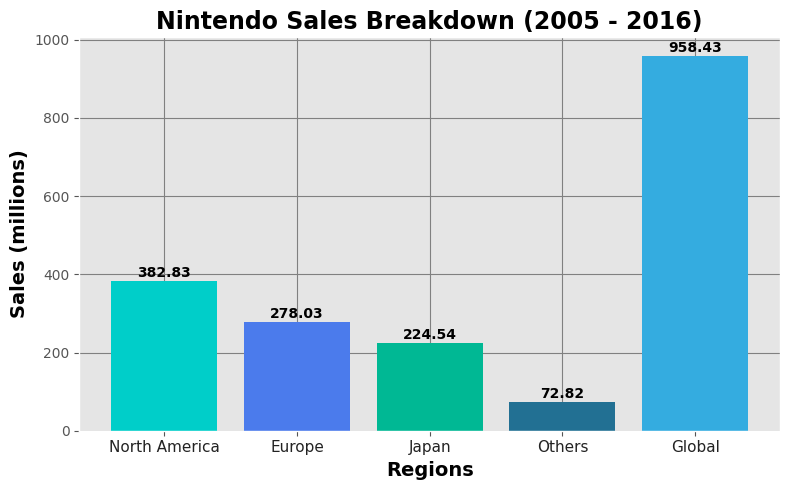

In [12]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 5))
bars = plt.bar(regioes, vendas, color=['#00cec9', '#4b7bec', '#00b894', '#227093', '#34ace0'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, round(yval, 2), ha='center', color='black', fontweight='bold')
    
plt.xlabel('Regions', fontweight='bold', color='black', fontsize = 14)
plt.ylabel('Sales (millions)', fontweight='bold', color='black', fontsize = 14)
plt.title(f"{df_empresa_mais_vendas_entre_2005_e_2016['Publisher'].values[0]} Sales Breakdown (2005 - 2016)", 
    fontweight='bold', fontsize = 17, color='black')

plt.xticks(fontsize = 11, color='#232323')
plt.grid(color = 'grey')

plt.tight_layout()
plt.show()


3) Qual o nome do jogo que menos foi vendido em 2008 do gênero Sports?

In [13]:
df_vgsales['Genre'].unique()


array(['Shooter', 'Misc', 'Fighting', 'Sports', 'Action', 'Platform',
       'Puzzle', 'Racing', 'Simulation', 'Adventure', 'Role-Playing',
       'Strategy'], dtype=object)

In [14]:
df_genero_sports_2008 = df_vgsales[(df_vgsales['Year'] == 2008) & (df_vgsales['Genre'] == 'Sports')]

df_menos_vendido_genero_sports_2008 = df_genero_sports_2008.loc[[df_genero_sports_2008['Global_Sales'].idxmin()]]

df_menos_vendido_genero_sports_2008


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9691,16058,Winning Post 7 Maximum 2008,PS2,2008,Sports,Tecmo Koei,0.0,0.0,0.01,0.0,0.01


4) Qual o percentual relacionado às vendas globais de jogos de Wii (excluindo-se América do norte, japão e europa) de 2006 até 2010?

In [15]:
df_vgsales['Platform'].unique()


array(['2600', 'NES', 'PC', 'DS', 'GB', 'SNES', 'GEN', 'GG', 'SCD', 'NG',
       'PS', 'SAT', '3DO', 'TG16', 'N64', 'PCFX', 'DC', 'WS', 'PS2', 'XB',
       'GBA', 'GC', 'PSP', 'X360', 'Wii', 'PS3', '3DS', 'PSV', 'WiiU',
       'PS4', 'XOne'], dtype=object)

In [16]:
df_vendas_wii_2006_ate_2010 = df_vgsales[
    (df_vgsales['Platform'] == 'Wii') & 
    (df_vgsales['Year'] >= 2006) & 
    (df_vgsales['Year'] <= 2010)
]
df_vendas_wii_2006_ate_2010.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6112,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
6114,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
6116,101,The Legend of Zelda: Twilight Princess,Wii,2006,Action,Nintendo,3.83,2.19,0.60,0.70,7.31
6133,491,WarioWare: Smooth Moves,Wii,2006,Puzzle,Nintendo,0.87,1.06,0.73,0.26,2.92
6143,709,Super Monkey Ball: Banana Blitz,Wii,2006,Misc,Sega,1.07,0.92,0.04,0.24,2.27


In [17]:
df_percentual_vendas_wii_2006_ate_2010 = df_vendas_wii_2006_ate_2010.groupby(['Platform'])[
    ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().reset_index()

df_percentual_vendas_wii_2006_ate_2010['Percentage_Other_Sales'] = (
    df_percentual_vendas_wii_2006_ate_2010['Other_Sales'] / df_percentual_vendas_wii_2006_ate_2010['Global_Sales']) * 100

df_percentual_vendas_wii_2006_ate_2010


,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Percentage_Other_Sales
0,Wii,445.89,232.71,59.31,70.82,809.28,8.750989


5) Mostre um gráfico de linhas com as vendas em diferentes plataformas ao longo dos anos.

In [18]:
df_vendas = df_vgsales.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()

df_vendas.head()


,Year,Platform,Global_Sales
0,1980,2600,11.38
1,1981,2600,35.77
2,1982,2600,28.86
3,1983,2600,5.83
4,1983,NES,10.96


In [19]:
df_vendas_n64 = df_vendas[df_vendas['Platform'] == 'N64']
df_vendas_wii = df_vendas[df_vendas['Platform'] == 'Wii']
df_vendas_x360 = df_vendas[df_vendas['Platform'] == 'X360']
df_vendas_ps4 = df_vendas[df_vendas['Platform'] == 'PS4']


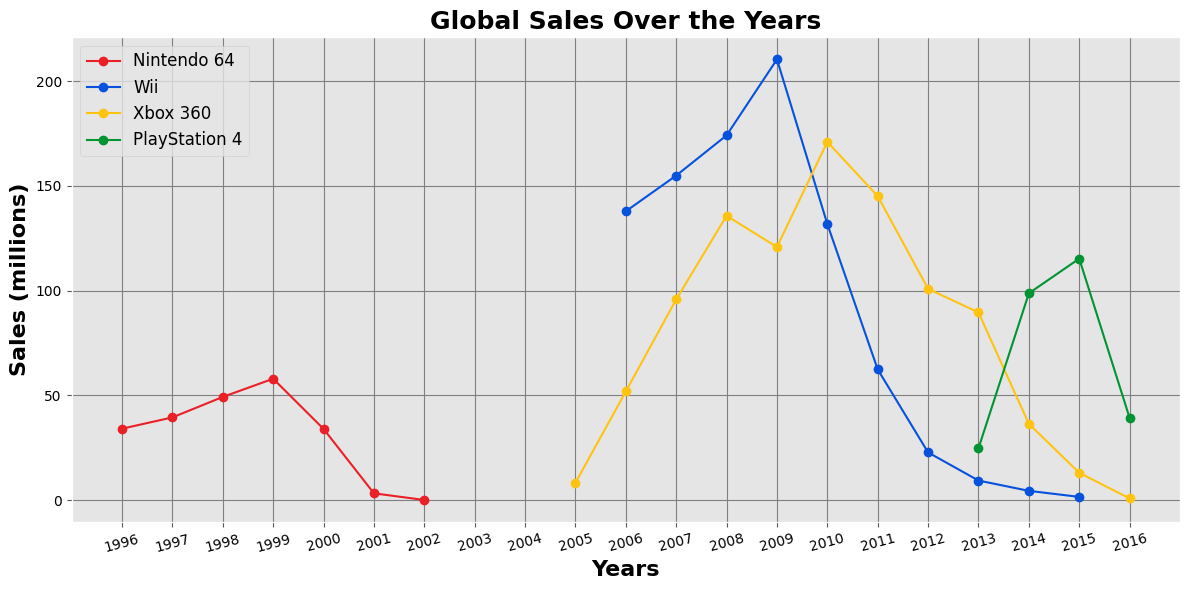

In [21]:
plt.figure(figsize=(12,6))

plt.plot(df_vendas_n64['Year'], df_vendas_n64['Global_Sales'], 
    color='#EA2027', marker='o', label='Nintendo 64')
plt.plot(df_vendas_wii['Year'], df_vendas_wii['Global_Sales'], 
    color='#0652DD', marker='o', label='Wii')
plt.plot(df_vendas_x360['Year'], df_vendas_x360['Global_Sales'], 
    color='#FFC312', marker='o', label='Xbox 360')
plt.plot(df_vendas_ps4['Year'], df_vendas_ps4['Global_Sales'], 
    color='#009432', marker='o', label='PlayStation 4')

plt.title('Global Sales Over the Years', fontsize=18, fontweight='bold')
plt.xlabel("Years", fontsize=16, color="black", fontweight='bold')
plt.ylabel("Sales (millions)", fontsize=16, color="black", fontweight='bold')
plt.xticks(range(df_vendas_n64['Year'].min(), df_vendas_ps4['Year'].max() + 1), fontsize=10, rotation=15, color="black")
plt.yticks(fontsize=10, color="black")
plt.legend(loc='upper left', fontsize=12)
plt.grid(which='major', color='grey')         
plt.tight_layout()
plt.show()


6) Mostre um gráfico de pizza com o percentual de vendas dos diferentes gêneros de jogos.

In [22]:
df_vendas_por_genero = df_vgsales.groupby(['Genre'])['Global_Sales'].sum().reset_index()

df_vendas_por_genero.head()


,Genre,Global_Sales
0,Action,1722.87
1,Adventure,234.80
2,Fighting,444.05
3,Misc,797.62
4,Platform,829.15


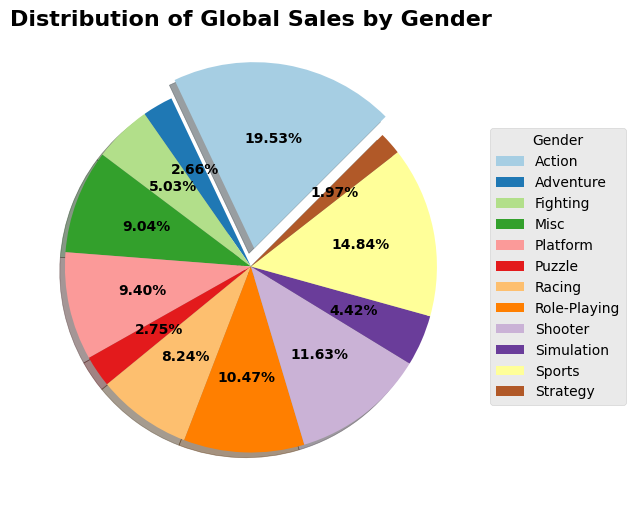

In [24]:
plt.figure(figsize=(6,8))

plt.pie (df_vendas_por_genero['Global_Sales'], startangle=45, shadow='true', autopct='%1.2f%%',
    colors=plt.cm.Paired(range(len(df_vendas_por_genero))), 
    explode=[0.1 if i == df_vendas_por_genero['Global_Sales'].idxmax() else 0 for i in range(len(df_vendas_por_genero))])

plt.legend(df_vendas_por_genero['Genre'], title="Gender", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Distribution of Global Sales by Gender", loc="center", fontsize=16, fontweight='bold')
plt.setp([txt for txt in plt.gca().texts if '%' in txt.get_text()], color="black", fontsize=10, fontweight='bold')
plt.show()


## Exercícios pandas

Utilize os arquivos [livros.csv](https://drive.google.com/file/d/1fzuUyFxhzhE9U4_-i3IIUTwvgr3QG1Hj/view?usp=sharing), [livros_genero.csv](https://drive.google.com/file/d/1Cww5lAb7l_LQXVhH1ieyIOWIrqorNKcn/view?usp=sharing) e [livros_classicos.csv](https://drive.google.com/file/d/1pbSReiGSIIlHHXbFBOAaA5zTlNTrbY9P/view?usp=sharing) como entrada para o processamento requerido nos seguintes exercícios.


In [25]:
import pandas as pd
import numpy as np

df_livros = pd.read_csv('../../dados_exercicios/livros.csv')
df_livros_genero = pd.read_csv('../../dados_exercicios/livros_genero.csv')
df_livros_classicos = pd.read_csv('../../dados_exercicios/livros_classicos.csv')


In [26]:
df_livros.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nome     10 non-null     object
 1   paginas  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


In [27]:
df_livros_genero.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   genero  11 non-null     object
 1   autor   11 non-null     object
dtypes: object(2)
memory usage: 304.0+ bytes


In [28]:
df_livros_classicos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nome    10 non-null     object
 1   autor   10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


1) Faça a concatenação das bases de dados livros.csv e livros_genero.csv e encontre qual o gênero de livro correspondente a cada livro.

In [29]:
df_livros_e_livros_genero = pd.concat([df_livros, df_livros_genero], axis=1)

df_livros_e_livros_genero


,nome,paginas,genero,autor
0,livro 1,257.0,Drama,Pedro
1,livro 2,106.0,Aventura,José
2,livro 3,150.0,Drama,Carlos
3,livro 4,175.0,Romance,Maria
4,livro 5,321.0,Romance,Fabio
5,livro 6,159.0,Aventura,Aline
6,livro 7,980.0,Drama,Paulo
7,livro 8,235.0,Aventura,Sandro
8,livro 9,745.0,Romance,Maria
9,livro 10,126.0,Aventura,Fabio


2) Faça a concatenação das bases de dados de livros e livros_genero e encontre qual os gêneros e os autores que não possuem um livro correspondente.

In [30]:
df_sem_livro_correspondente = df_livros_e_livros_genero[df_livros_e_livros_genero.isnull().any(axis=1)]

df_sem_livro_correspondente


,nome,paginas,genero,autor
10,NaN,NaN,Romance,Pedro


3) Faça a junção das bases de livros e livros clássicos.

In [31]:
df_livros_e_livros_classicos = pd.concat([df_livros_e_livros_genero, df_livros_classicos], axis=0)

df_livros_e_livros_classicos


,nome,paginas,genero,autor
0,livro 1,257.0,Drama,Pedro
1,livro 2,106.0,Aventura,José
2,livro 3,150.0,Drama,Carlos
3,livro 4,175.0,Romance,Maria
4,livro 5,321.0,Romance,Fabio
5,livro 6,159.0,Aventura,Aline
6,livro 7,980.0,Drama,Paulo
7,livro 8,235.0,Aventura,Sandro
8,livro 9,745.0,Romance,Maria
9,livro 10,126.0,Aventura,Fabio


4) Faça a junção das bases de livros e livros clássicos apenas com os elementos em comum entre ambos e remova os índices dos antigos dataframes.

In [32]:
df_livros_e_livros_classicos_em_comum = pd.concat([df_livros_e_livros_genero, df_livros_classicos], join='inner', axis=0)

df_livros_e_livros_classicos_em_comum.reset_index(drop=True)


,nome,autor
0,livro 1,Pedro
1,livro 2,José
2,livro 3,Carlos
3,livro 4,Maria
4,livro 5,Fabio
5,livro 6,Aline
6,livro 7,Paulo
7,livro 8,Sandro
8,livro 9,Maria
9,livro 10,Fabio


5) Faça a junção das bases de livros e livros clássicos apenas com os elementos comuns entre ambos, e adicione chaves para o dataframe de livros e de livros clássicos.

In [33]:
df_livros_e_livros_classicos_com_chaves = pd.concat([df_livros_e_livros_genero, df_livros_classicos], 
    join='inner', axis=0, keys=[0, 1])

df_livros_e_livros_classicos_com_chaves


nome    autor
0 0    livro 1    Pedro
  1    livro 2     José
  2    livro 3   Carlos
  3    livro 4    Maria
  4    livro 5    Fabio
  5    livro 6    Aline
  6    livro 7    Paulo
  7    livro 8   Sandro
  8    livro 9    Maria
  9   livro 10    Fabio
  10       NaN    Pedro
1 0    livro 1    Jorge
  1    livro 2   Santos
  2    livro 3  Leandro
  3    livro 4    Clara
  4    livro 5   Flavia
  5    livro 6  Leandro
  6    livro 7   Santos
  7    livro 8   Marcia
  8    livro 9   Marcia
  9   livro 10    Clara

6) Faça a junção das bases de livros e livros clássicos apenas com os elementos comuns entre ambos, e adicione chaves para o dataframe de livros e de livros clássicos, além de nomes para os índices.

In [34]:
df_livros_e_livros_classicos_com_indices_nomeados = pd.concat([df_livros_e_livros_genero, df_livros_classicos], 
    join='inner', axis=0, keys=['Comuns', 'Clássicos'])

df_livros_e_livros_classicos_com_indices_nomeados


nome    autor
Comuns    0    livro 1    Pedro
          1    livro 2     José
          2    livro 3   Carlos
          3    livro 4    Maria
          4    livro 5    Fabio
          5    livro 6    Aline
          6    livro 7    Paulo
          7    livro 8   Sandro
          8    livro 9    Maria
          9   livro 10    Fabio
          10       NaN    Pedro
Clássicos 0    livro 1    Jorge
          1    livro 2   Santos
          2    livro 3  Leandro
          3    livro 4    Clara
          4    livro 5   Flavia
          5    livro 6  Leandro
          6    livro 7   Santos
          7    livro 8   Marcia
          8    livro 9   Marcia
          9   livro 10    Clara

7) Faça a junção das bases de dados livros e livros_classicos e verifique a integridade do dataframe resultante.

In [35]:
df_livros_verificar_integridade = pd.concat([df_livros_e_livros_genero, df_livros_classicos], 
    join='outer', axis=0, keys=['Comuns', 'Clássicos'])

df_livros_verificar_integridade.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21 entries, ('Comuns', 0) to ('Clássicos', 9)
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   nome     20 non-null     object 
 1   paginas  10 non-null     float64
 2   genero   11 non-null     object 
 3   autor    21 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.2+ KB


In [36]:
df_livros_verificar_integridade = df_livros_verificar_integridade.fillna({
    'nome':'Não Informado',
    'paginas':'Não Informado', 
    'genero':'Não Informado'
})

df_livros_verificar_integridade


nome        paginas         genero    autor
Comuns    0         livro 1          257.0          Drama    Pedro
          1         livro 2          106.0       Aventura     José
          2         livro 3          150.0          Drama   Carlos
          3         livro 4          175.0        Romance    Maria
          4         livro 5          321.0        Romance    Fabio
          5         livro 6          159.0       Aventura    Aline
          6         livro 7          980.0          Drama    Paulo
          7         livro 8          235.0       Aventura   Sandro
          8         livro 9          745.0        Romance    Maria
          9        livro 10          126.0       Aventura    Fabio
          10  Não Informado  Não Informado        Romance    Pedro
Clássicos 0         livro 1  Não Informado  Não Informado    Jorge
          1         livro 2  Não Informado  Não Informado   Santos
          2         livro 3  Não Informado  Não Informado  Leandro
          3         livro 4  Não Informado  Não Informado    Clara
          4         livro 5  Não Informado  Não Informado   Flavia
          5         livro 6  Não Informado  Não Informado  Leandro
          6         livro 7  Não Informado  Não Informado   Santos
          7         livro 8  Não Informado  Não Informado   Marcia
          8         livro 9  Não Informado  Não Informado   Marcia
          9        livro 10  Não Informado  Não Informado    Clara